# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carlsbad
Processing Record 2 of Set 1 | mananjary
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | magadan
Processing Record 6 of Set 1 | happy valley-goose bay
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | meadow lakes
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | chengtangcun
Processing Record 16 of Set 1 | dubinino
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | toga village
City not found. Skipping...
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | ladismith
City not found. Skipping...
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carlsbad,33.1581,-117.3506,25.98,82,100,2.06,US,1718215019
1,mananjary,-21.2167,48.3333,19.94,86,44,3.98,MG,1718215123
2,adamstown,-25.0660,-130.1015,21.08,77,78,4.88,PN,1718215124
3,magadan,59.5667,150.8000,8.63,85,82,1.95,RU,1718215125
4,happy valley-goose bay,53.3168,-60.3315,24.17,35,40,3.60,CA,1718215125


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carlsbad,33.1581,-117.3506,25.98,82,100,2.06,US,1718215019
1,mananjary,-21.2167,48.3333,19.94,86,44,3.98,MG,1718215123
2,adamstown,-25.0660,-130.1015,21.08,77,78,4.88,PN,1718215124
3,magadan,59.5667,150.8000,8.63,85,82,1.95,RU,1718215125
4,happy valley-goose bay,53.3168,-60.3315,24.17,35,40,3.60,CA,1718215125


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

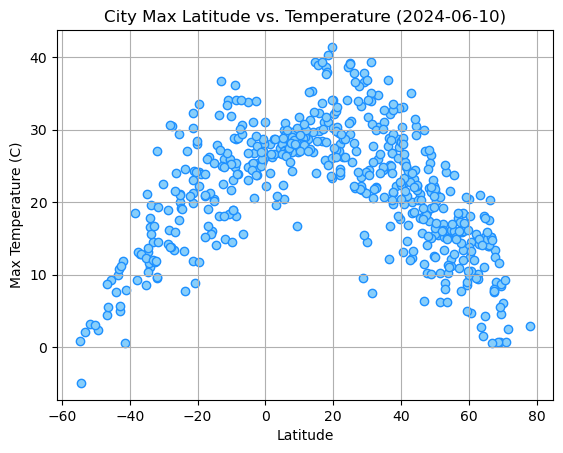

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-10)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

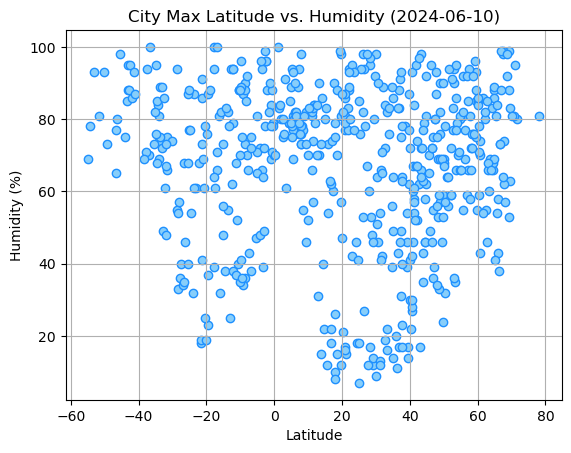

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-06-10)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

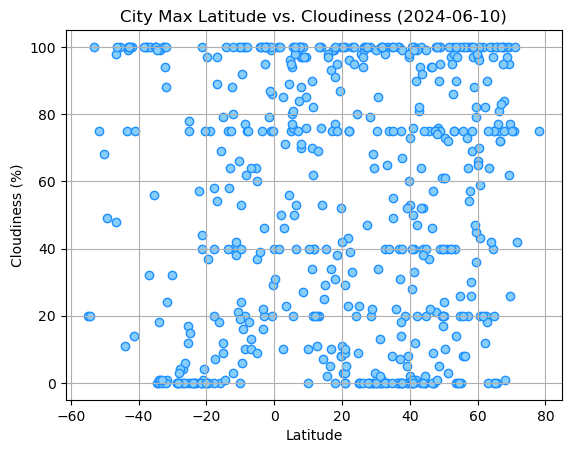

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-06-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

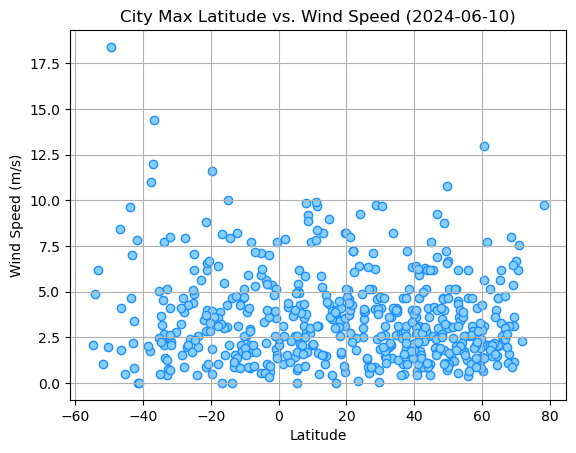

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-06-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Equation for r_value 
r_value = rvalue**2


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carlsbad,33.1581,-117.3506,25.98,82,100,2.06,US,1718215019
3,magadan,59.5667,150.8000,8.63,85,82,1.95,RU,1718215125
4,happy valley-goose bay,53.3168,-60.3315,24.17,35,40,3.60,CA,1718215125
7,badger,64.8000,-147.5333,15.20,88,75,4.63,US,1718215126
9,meadow lakes,61.6247,-149.6011,9.99,86,100,2.06,US,1718215126


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mananjary,-21.2167,48.3333,19.94,86,44,3.98,MG,1718215123
2,adamstown,-25.0660,-130.1015,21.08,77,78,4.88,PN,1718215124
5,blackmans bay,-43.0167,147.3167,5.07,88,99,2.16,AU,1718215125
6,uturoa,-16.7333,-151.4333,26.17,66,89,8.13,PF,1718215126
8,ushuaia,-54.8000,-68.3000,0.81,69,20,2.06,AR,1718215126


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5320630848238054


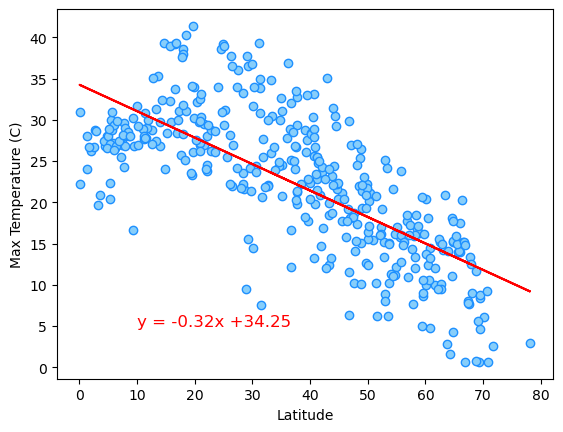

In [17]:
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=12,color="red")

# Show the plot
plt.show()


The r-value is: 0.5993394621956756


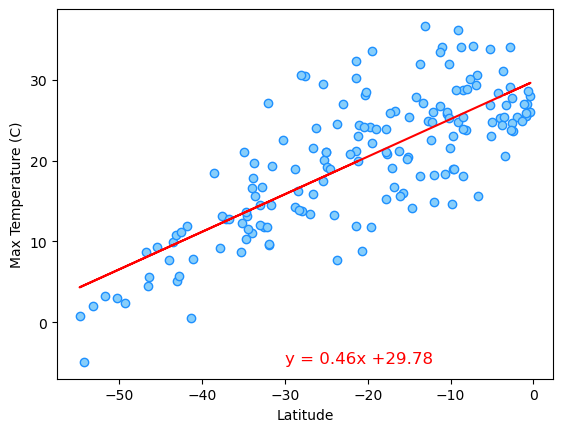

In [18]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature for Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,-5),fontsize=12,color="red")

# Show the plot
plt.show()


**Discussion about the linear relationship:** 
- For Northern Hemisphere line regression plot, there's a moderate negative correlation between the latitude and the temperature (C) with a r-value of 0.53. 
- For Southern Hemisphere line regression plot, there's a moderate positive correlation between the latitude and the temperature (C) with a r-value of 0.60. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.001748199884359904


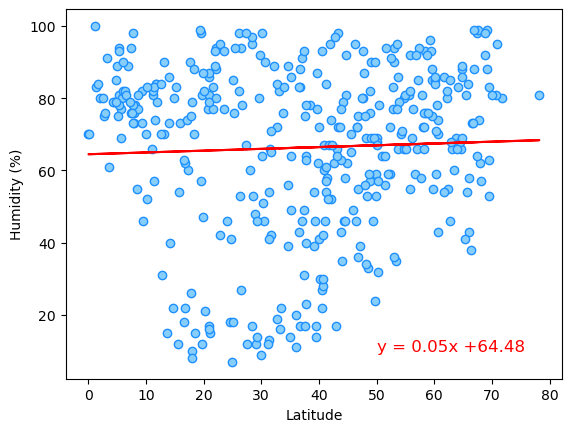

In [19]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity 
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")

# Show plot
plt.show()

The r-value is: 0.014639368203231319


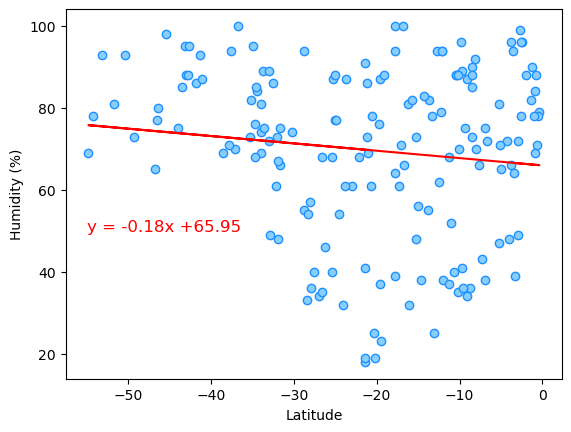

In [20]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity 
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- Based on the linear regression made for the Northern and Souther Hemisphere latitude vs. Humidity scatter plot, there are no relation between latitude and humidity of the location. This is shown on both the scatter plot with r-value close to 0 and linear regression line that's almost flat, which supports no relation between the two.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0005168175757468942


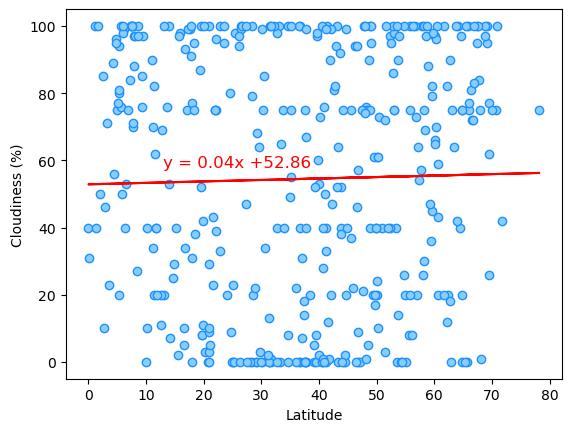

In [26]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. Cloudiness 
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(13,58),fontsize=12,color="red")

# Show plot
plt.show()

The r-value is: 0.0004124918318879658


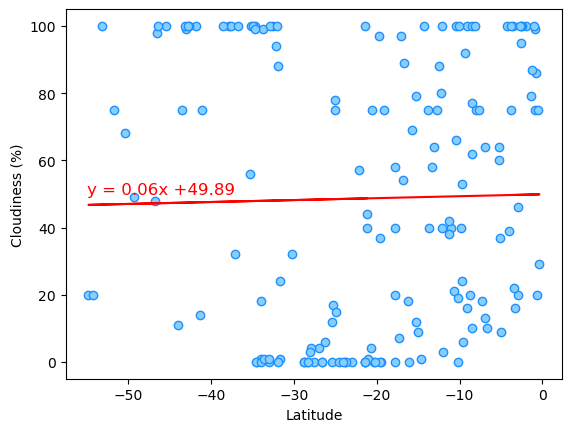

In [22]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. Cloudiness 
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- Based on the linear regression made for the Northern and Souther Hemisphere latitude vs. cloudiness scatter plot, there are no relation between latitude and cloudiness of the location. This is shown on both the scatter plot with r-value close to 0 and linear regression line that's almost flat, which supports no relation between the two.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008001304420837168


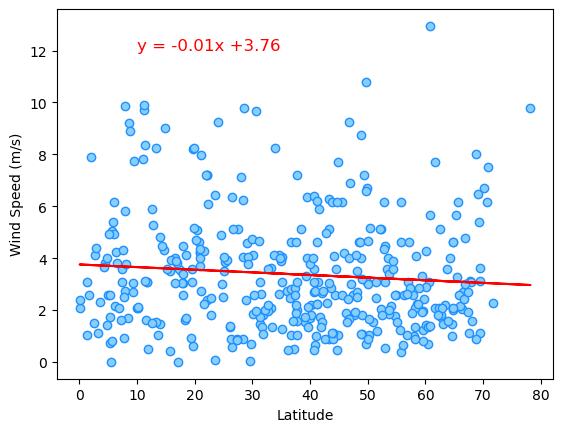

In [27]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. Cloudiness 
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=12,color="red")

# Show plot
plt.show()

The r-value is: 0.016459360668936312


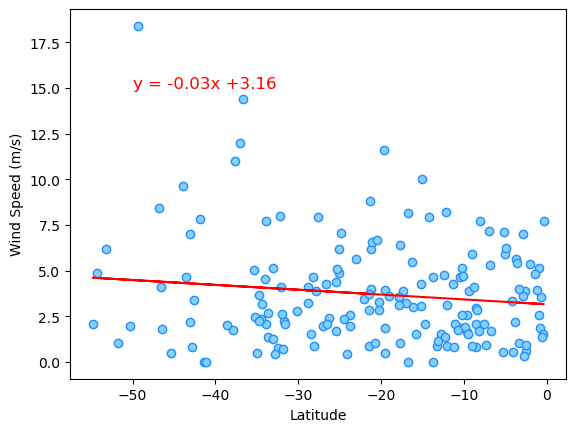

In [28]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. Cloudiness 
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", color="lightskyblue", edgecolors="dodgerblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

# Plot line of regression 
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=12,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- Based on the linear regression made for the Northern and Souther Hemisphere latitude vs. wind speed scatter plot, there are no relation between latitude and wind speed of the location. This is shown on both the scatter plot with r-value close to 0 and linear regression line that's almost flat, which supports no relation between the two.